In [26]:
import pandas as pd

data = pd.read_csv('simple_kaggle_dataset.csv')
data.describe()

,Product_ID,Price,Quantity_Sold,Rating
count,100.000000,100.000000,100.000000,100.000000
mean,50.500000,2769.850000,24.470000,3.140000
std,29.011492,1255.962083,13.994555,1.176195
min,1.000000,564.000000,1.000000,1.100000
25%,25.750000,1780.250000,13.500000,2.175000
50%,50.500000,2698.500000,24.000000,3.200000
75%,75.250000,3821.000000,35.000000,4.200000
max,100.000000,4993.000000,49.000000,5.000000


In [27]:
data.head()

,Product_ID,Category,Price,Quantity_Sold,Rating
0,1,Grocery,661,17,2.0
1,2,Furniture,4797,38,4.9
2,3,Electronics,2481,24,2.6
3,4,Grocery,1495,5,4.6
4,5,Grocery,3842,34,3.5


In [32]:
low_cardinality_cols = [col for col in data.columns if data[col].dtype=='object']
print(low_cardinality_cols)
num_cat = data['Category'].nunique()
print(num_cat)

['Category']
4


In [102]:
X_full = data
y_full = X_full.Quantity_Sold
X_full = X_full.drop(['Price','Product_ID'],axis=1)
X_full.head()

,Category,Quantity_Sold,Rating
0,Grocery,17,2.0
1,Furniture,38,4.9
2,Electronics,24,2.6
3,Grocery,5,4.6
4,Grocery,34,3.5


In [103]:
y_full.head()

0    17
1    38
2    24
3     5
4    34
Name: Quantity_Sold, dtype: int64

In [104]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X_full, y_full,train_size=0.8, test_size=0.2, random_state=0)
X_train.head()
X_train['Category'].head()

43      Furniture
62    Electronics
3         Grocery
71       Clothing
45      Furniture
Name: Category, dtype: object

In [105]:
from sklearn.preprocessing import OneHotEncoder

OH_encoder = OneHotEncoder(handle_unknown='ignore',sparse_output=False)
OH_Cat_train = pd.DataFrame(OH_encoder.fit_transform(X_train[['Category']]),index=X_train.index,columns=OH_encoder.get_feature_names_out(['Category']))
OH_Cat_valid = pd.DataFrame(OH_encoder.transform(X_valid[['Category']]),index=X_valid.index,columns=OH_encoder.get_feature_names_out(['Category']))

X_train_num = X_train.copy().drop('Category',axis=1)
X_valid_num = X_valid.copy().drop('Category',axis=1)

new_X_train = pd.concat([X_train_num,OH_Cat_train],axis=1)
new_X_valid = pd.concat([X_valid_num,OH_Cat_valid],axis=1)

new_X_train.head()
new_X_valid.head()

,Quantity_Sold,Rating,Category_Clothing,Category_Electronics,Category_Furniture,Category_Grocery
26,33,2.5,1.0,0.0,0.0,0.0
86,33,1.3,1.0,0.0,0.0,0.0
2,24,2.6,0.0,1.0,0.0,0.0
55,19,4.6,0.0,0.0,1.0,0.0
75,29,1.2,1.0,0.0,0.0,0.0


In [106]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

model = RandomForestRegressor(n_estimators=300,max_depth=None,random_state=42)
model.fit(new_X_train,y_train)

RandomForestRegressor(n_estimators=300, random_state=42)

In [107]:
predictions = model.predict(new_X_valid)
print(predictions)

[32.45333333 32.14333333 23.94       18.93333333 29.44333333  2.96666667
 20.03333333 35.02333333 35.01       32.6        40.93666667  6.91666667
 17.81       16.08333333 11.01666667 40.16333333 20.06333333  6.76
 28.13       48.01      ]


In [108]:
mae = mean_absolute_error(predictions,y_valid)
print(mae)

0.17583333333333306


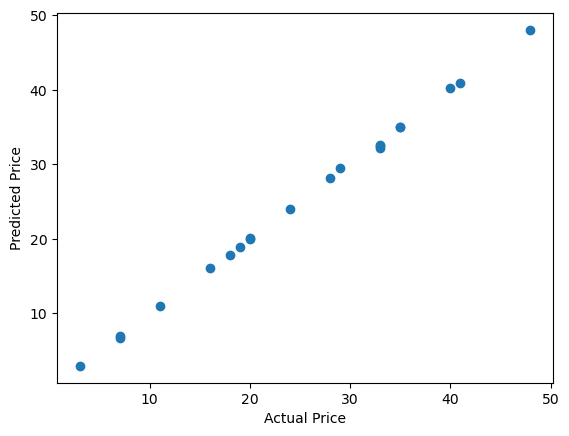

In [109]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(y_valid,predictions)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()